<a href="https://colab.research.google.com/github/verondel/data_analysis/blob/main/hw_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 8. Нелинейные модели для классификации. Выбор лучшей модели для классификации. Построение программного конвеера

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## 1-3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/sem5_python/data/my")

In [ ]:
df = pd.read_csv('ObesityDataSet.csv')

[сслыка на датасет](https://www.kaggle.com/code/khsamaha/obesity-eda-xgboost-py)

1. `Gender`: Пол (женский, мужской).
2. `Age`: Возраст.
3. `Height`: Рост.
4. `Weight`: Вес.
5. `family_history_with_overweight`: Семейная история ожирения (да, нет).
6. `FAVC`: Частое употребление калорийной пищи (да, нет).
7. `FCVC`: Частота употребления овощей (шкала от 1 до 3).
8. `NCP`: Количество основных приемов пищи (шкала от 1 до 4).
9. `CAEC`: Употребление пищи между основными приемами (никогда, иногда, часто, всегда).
10. `SMOKE`: Курение (да, нет).
11. `CH2O`: Употребление воды (шкала от 1 до 3).
12. `SCC`: Контроль калорийного содержания (да, нет).
13. `FAF`: Частота физической активности (шкала от 0 до 3).
14. `TUE`: Время, проведенное перед экранами (шкала от 0 до 2).
15. `CALC`: Употребление алкоголя (никогда, иногда, часто, всегда).
16. `MTRANS`: Средство передвижения (Автомобиль, Мотоцикл, Велосипед, Пешком, Общественный транспорт).
17. `NObeyesdad`: Уровень ожирения (несколько категорий).

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
array = df.values

## 4

In [ ]:
# Кодирование категориальных признаков
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Выделение факторных (X) и результативного (Y) признаков
X = df.drop('NObeyesdad', axis=1)
Y = df['NObeyesdad']

# Вывод содержимого переменных X и Y
X.head(), Y.head()

(   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
 0       0  21.0    1.62    64.0                               1     0   2.0   
 1       0  21.0    1.52    56.0                               1     0   3.0   
 2       1  23.0    1.80    77.0                               1     0   2.0   
 3       1  27.0    1.80    87.0                               0     0   3.0   
 4       1  22.0    1.78    89.8                               0     0   2.0   
 
    NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
 0  3.0     2      0   2.0    0  0.0  1.0     3       3  
 1  3.0     2      1   3.0    1  3.0  0.0     2       3  
 2  3.0     2      0   2.0    0  2.0  1.0     1       3  
 3  3.0     2      0   2.0    0  2.0  0.0     1       4  
 4  1.0     2      0   2.0    0  0.0  0.0     2       3  ,
 0    1
 1    1
 2    1
 3    5
 4    6
 Name: NObeyesdad, dtype: int64)

**Вывод**: Задача классификации заключается в предсказании уровня ожирения (NObeyesdad), он будет результативным признаком (Y), а остальные - факторными (X). ​

Факторные признаки (X) и результативный признак (Y) преобразованы следующим образом:
* **Факторные признаки (X)**: Все категориальные признаки были преобразованы в числовые значения с использованием кодирования метками (Label Encoding). Присутствуют такие признаки, как пол, возраст, рост, вес, история ожирения в семье, частота употребления калорийной пищи и другие.
* **Результативный признак (Y)**: Уровень ожирения (NObeyesdad) также был закодирован в числовые значения.

## 5-12. KNN

In [ ]:
# 5. Задание разбиения на фолды
n_splits = 10
random_state = 7
kfold = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)

kfold

KFold(n_splits=10, random_state=7, shuffle=True)

In [ ]:
# 6. Создание модели k-NN
model_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# 7. Проведение кросс-валидации
results_knn = cross_val_score(model_knn, X, Y, cv=kfold, scoring=make_scorer(f1_score, average='weighted'))

# Шаг 8: Вывод среднего значения F-меры
mean_f1_score_knn = np.mean(results_knn)
std_f1_score_knn = np.std(results_knn)

mean_f1_score_knn, std_f1_score_knn

(0.8682403162998489, 0.02046123095041999)

**Вывод**: Для модели kNN, средняя F-мера составляет приблизительно 0.8682, а стандартное отклонение этой оценки составляет около 0.0205. Это показывает, что модель обеспечивает достаточно высокое качество классификации с учетом баланса между точностью и полнотой. ​

In [ ]:
# 9. Обучение модели k-NN на всех данных
model_knn.fit(X, Y)

In [ ]:
# 10. Произвольные значения факторных признаков для двух новых наблюдений
x_new = np.array([[0, 30, 1.70, 70, 1, 1, 2, 3, 2, 0, 2, 0, 2, 1, 1, 3],
                  [1, 25, 1.75, 80, 0, 0, 3, 3, 1, 1, 3, 1, 3, 2, 2, 4]])

In [ ]:
# 11. Прогноз классов для новых наблюдений
predicted_classes = model_knn.predict(x_new)

# 12. Прогноз вероятности классов для новых наблюдений
predicted_probabilities = model_knn.predict_proba(x_new)

predicted_classes, predicted_probabilities

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([5, 6]),
 array([[0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
        [0. , 0. , 0. , 0. , 0. , 0.4, 0.6]]))

In [ ]:
original_category_5 = label_encoders['NObeyesdad'].inverse_transform([5])
original_category_6 = label_encoders['NObeyesdad'].inverse_transform([6])
original_categories = {5: original_category_5[0], 6: original_category_6[0]}
original_categories

{5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}

**Вывод**:
* Для первого наблюдения вероятности: 80% для класса `Overweight_Level_I` и 20% для класса `Overweight_Level_II`.
* Для второго наблюдения вероятности: 40% для класса `Overweight_Level_I` и 60% для класса `Overweight_Level_II`.

## 13-19. naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from scipy import stats

# Шаг 13: Оценка нормальности распределения факторных признаков
normality_assessment = {column: stats.shapiro(df[column])[1] for column in df.columns[:-1]}

normality_assessment

{'Gender': 0.0,
 'Age': 3.519136885397486e-39,
 'Height': 2.7788857437371917e-08,
 'Weight': 3.766832030646535e-18,
 'family_history_with_overweight': 0.0,
 'FAVC': 0.0,
 'FCVC': 2.437698808539452e-41,
 'NCP': 0.0,
 'CAEC': 0.0,
 'SMOKE': 0.0,
 'CH2O': 1.1144337199467901e-29,
 'SCC': 0.0,
 'FAF': 7.707325606470091e-33,
 'TUE': 7.3886436768425435e-37,
 'CALC': 0.0,
 'MTRANS': 0.0}

**Вывод**: Все значения p-value в normality_assessment равны нулю или очень близки к нему. Это означает, что распределение большинства факторных признаков отличается от нормального распределения. Наивный байесовский классификатор предполагает, что признаки распределены нормально.

В данном случае использование Гауссовского наивного байесовского классификатора не совсем целесообразным.

In [ ]:
# Создание и обучение модели наивного байесовского классификатора (GaussianNB)
# Шаг 14
model_nb = GaussianNB()

# Шаг 15: Проведение кросс-валидации
results_nb = cross_val_score(model_nb, X, Y, cv=kfold, scoring=make_scorer(f1_score, average='weighted'))

# Шаг 16: Вывод средней f мере и её стандартного отклонения
mean_f1_score_nb = results_nb.mean()
std_f1_score_nb = results_nb.std()

mean_f1_score_nb, std_f1_score_nb

(0.5802945230429976, 0.03828967149022985)

In [ ]:
# Создание и обучение модели наивного байесовского классификатора (MultinomialNB)
model_nb_m = MultinomialNB()
results_nb_m = cross_val_score(model_nb_m, X, Y, cv=kfold, scoring=make_scorer(f1_score, average='weighted'))

mean_f1_score_nb_m = results_nb_m.mean()
std_f1_score_nb_m = results_nb_m.std()

mean_f1_score_nb_m, std_f1_score_nb_m

(0.581016060236317, 0.038164466231444226)

**Вывод**: Обе модели, GaussianNB и MultinomialNB, показывают схожее качество предсказаний на данном наборе данных. Их значения F1-меры близки друг к другу и имеют небольшие стандартные отклонения, что указывает на стабильность результатов.

In [ ]:
# Шаг 17: Обучение модели на всех данных
model_nb.fit(X, Y)

# Шаг 18 и 19: Прогноз классов и вероятности классов для новых наблюдений
predicted_classes_nb = model_nb.predict(x_new)
predicted_probabilities_nb = model_nb.predict_proba(x_new)

predicted_classes_nb, predicted_probabilities_nb

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


(array([2, 1]),
 array([[6.38526201e-007, 1.06936621e-002, 5.30454072e-001,
         1.15648017e-037, 0.00000000e+000, 1.52273867e-001,
         3.06577760e-001],
        [2.30336844e-060, 1.00000000e+000, 1.76366019e-061,
         4.65907665e-143, 0.00000000e+000, 9.01790870e-019,
         5.13994671e-026]]))

In [ ]:
original_category_2 = label_encoders['NObeyesdad'].inverse_transform([2])
original_category_1 = label_encoders['NObeyesdad'].inverse_transform([1])
original_category_2[0], original_category_1[0]

('Obesity_Type_I', 'Normal_Weight')

**Вывод**:
* Первое наблюдение было классифицировано как класс `Obesity_Type_I` (53%).
* Второе наблюдение было классифицировано как класс `Normal_Weight` (примерно 100%).

## 20-25. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Шаг 20: Построение модели решающего дерева
model_dt = DecisionTreeClassifier()

# Шаг 21: Проведение кросс-валидации
results_dt = cross_val_score(model_dt, X, Y, cv=kfold, scoring=make_scorer(f1_score, average='weighted'))

# Шаг 22: Вывод средней доли правильных ответов и стандартного отклонения
mean_f1_score_dt = results_dt.mean()
std_f1_score_dt = results_dt.std()

mean_f1_score_dt, std_f1_score_dt

(0.9383031373730587, 0.014311818785230543)

In [ ]:
# Шаг 23: Обучение модели решающего дерева на всех данных
model_dt.fit(X, Y)

# Шаг 24 и 25: Прогноз классов и вероятности классов для новых наблюдений
predicted_classes_dt = model_dt.predict(x_new)
predicted_probabilities_dt = model_dt.predict_proba(x_new)

predicted_classes_dt, predicted_probabilities_dt

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(array([5, 5]),
 array([[0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.]]))

In [ ]:
original_category_5[0]

'Overweight_Level_I'

**Вывод**: Оба наблюдения были классифицированы как класс `Obesity_Type_I` со 100% вероятностями

## 26-31 Построение программного конвеера

In [ ]:
# Шаг 26: Создание пустого списка моделей
models = []

'''
LR – логистическая регрессия – LogisticRegression(solver='liblinear').
SVM – линейный метод опорных векторов – SVC(kernel='linear').
LDA – линейный дискриминантный анализ – LinearDiscriminantAnalysis().
KNN – модель ближайшего соседа – KNeighborsClassifier().
NB – наивный байесовский классификатор – GaussianNB().
CART – модель решающего дерева – DecisionTreeClassifier().
'''

# Шаг 27: Добавление моделей в список
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SVM', SVC(kernel='linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))

In [ ]:
# Шаг 28: Создание пустых списков для результатов и названий моделей
results = []
names = []

# Шаг 29: Задание критериев оценки качества моделей
scoring = make_scorer(f1_score, average='weighted')

# Шаг 30: Оценка моделей
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")


LR: 0.7135 (0.0252)
SVM: 0.8759 (0.0201)
LDA: 0.8898 (0.0179)
KNN: 0.8682 (0.0205)
NB: 0.5803 (0.0383)
CART: 0.9351 (0.0170)


In [ ]:
results_acc = []
names_acc = []

# Шаг 29: Задание критериев оценки качества моделей
scoring = make_scorer(f1_score, average='weighted')

# Шаг 30: Оценка моделей
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results_acc.append(cv_results)
    names_acc.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

**Вывод**:
Модель решающего дерева (CART) показала лучшие результаты по средней F-мере (0.9364), также у этой модели одно из самых низких стандартных отклонений (0.0178).

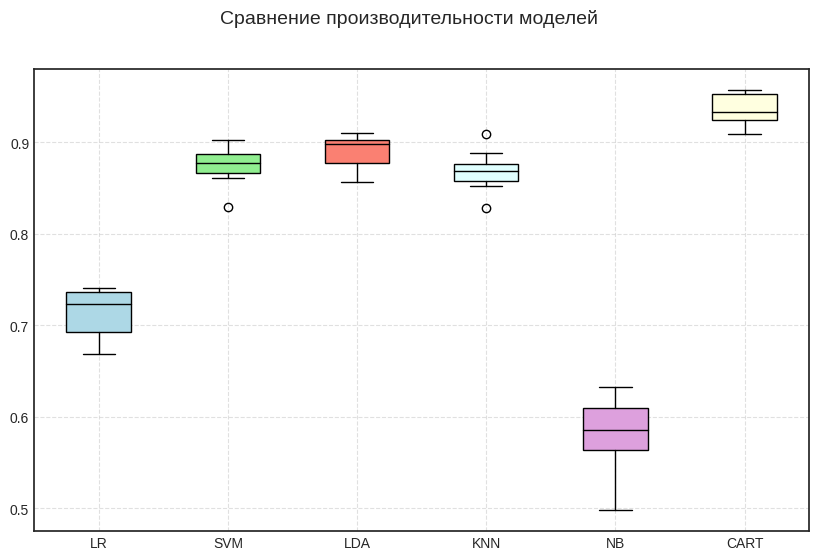

In [ ]:
# Шаг 31: Изображение результатов в виде ящика с усами
pastel_colors = ['lightblue', 'lightgreen', 'salmon', 'lightcyan', 'plum', 'lightyellow']

# Создание и настройка графика
plt.figure(figsize=(10, 6))
plt.suptitle('Сравнение производительности моделей', fontsize=14)
bplot = plt.boxplot(results, labels=names, patch_artist=True, medianprops=dict(color="black"))

# Раскрашивание ящиков в пастельные цвета
for patch, color in zip(bplot['boxes'], pastel_colors):
    patch.set_facecolor(color)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

